# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [222]:
import yfinance as yf

tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="max")
tsla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2024-02-13,183.990005,187.259995,182.110001,184.020004,86759500,0,0.0
2024-02-14,185.300003,188.889999,183.350006,188.710007,81203000,0,0.0
2024-02-15,189.160004,200.880005,188.860001,200.449997,120831800,0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [223]:
data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text
tsla_revenue = pd.read_html(data)[0]
tsla_revenue.index = tsla_revenue["Tesla Annual Revenue(Millions of US $)"].astype(str)
tsla_revenue.index.name = "Date"
tsla_revenue["Revenue"] = tsla_revenue["Tesla Annual Revenue(Millions of US $).1"].str.replace(',|\$',"")
tsla_revenue["Revenue"] = tsla_revenue["Revenue"].astype(float)
tsla_revenue = tsla_revenue.drop(["Tesla Annual Revenue(Millions of US $)", "Tesla Annual Revenue(Millions of US $).1"], axis=1)

In [224]:
tsla_revenue

,Revenue
Date,
2021,53823.0
2020,31536.0
2019,24578.0
2018,21461.0
2017,11759.0
2016,7000.0
2015,4046.0
2014,3198.0
2013,2013.0


# Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [225]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-13,14.200000,14.400000,13.770000,14.170000,3788700,0.0,0.0
2024-02-14,14.330000,14.430000,14.050000,14.410000,2504400,0.0,0.0
2024-02-15,14.540000,14.750000,14.230000,14.510000,2400500,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [226]:
data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text
gme_revenue = pd.read_html(data)[0]

In [227]:
gme_revenue.index = gme_revenue["GameStop Annual Revenue(Millions of US $)"].astype(str)
gme_revenue.index.name = "Date"
gme_revenue["Revenue"] = gme_revenue["GameStop Annual Revenue(Millions of US $).1"].str.replace(',|\$',"")
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue = gme_revenue.drop(["GameStop Annual Revenue(Millions of US $)", "GameStop Annual Revenue(Millions of US $).1"], axis=1)

In [228]:
gme_revenue

,Revenue
Date,
2020,6466.0
2019,8285.0
2018,8547.0
2017,7965.0
2016,9364.0
2015,9296.0
2014,9040.0
2013,8887.0
2012,9551.0


# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [229]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.index <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.index, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.index, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

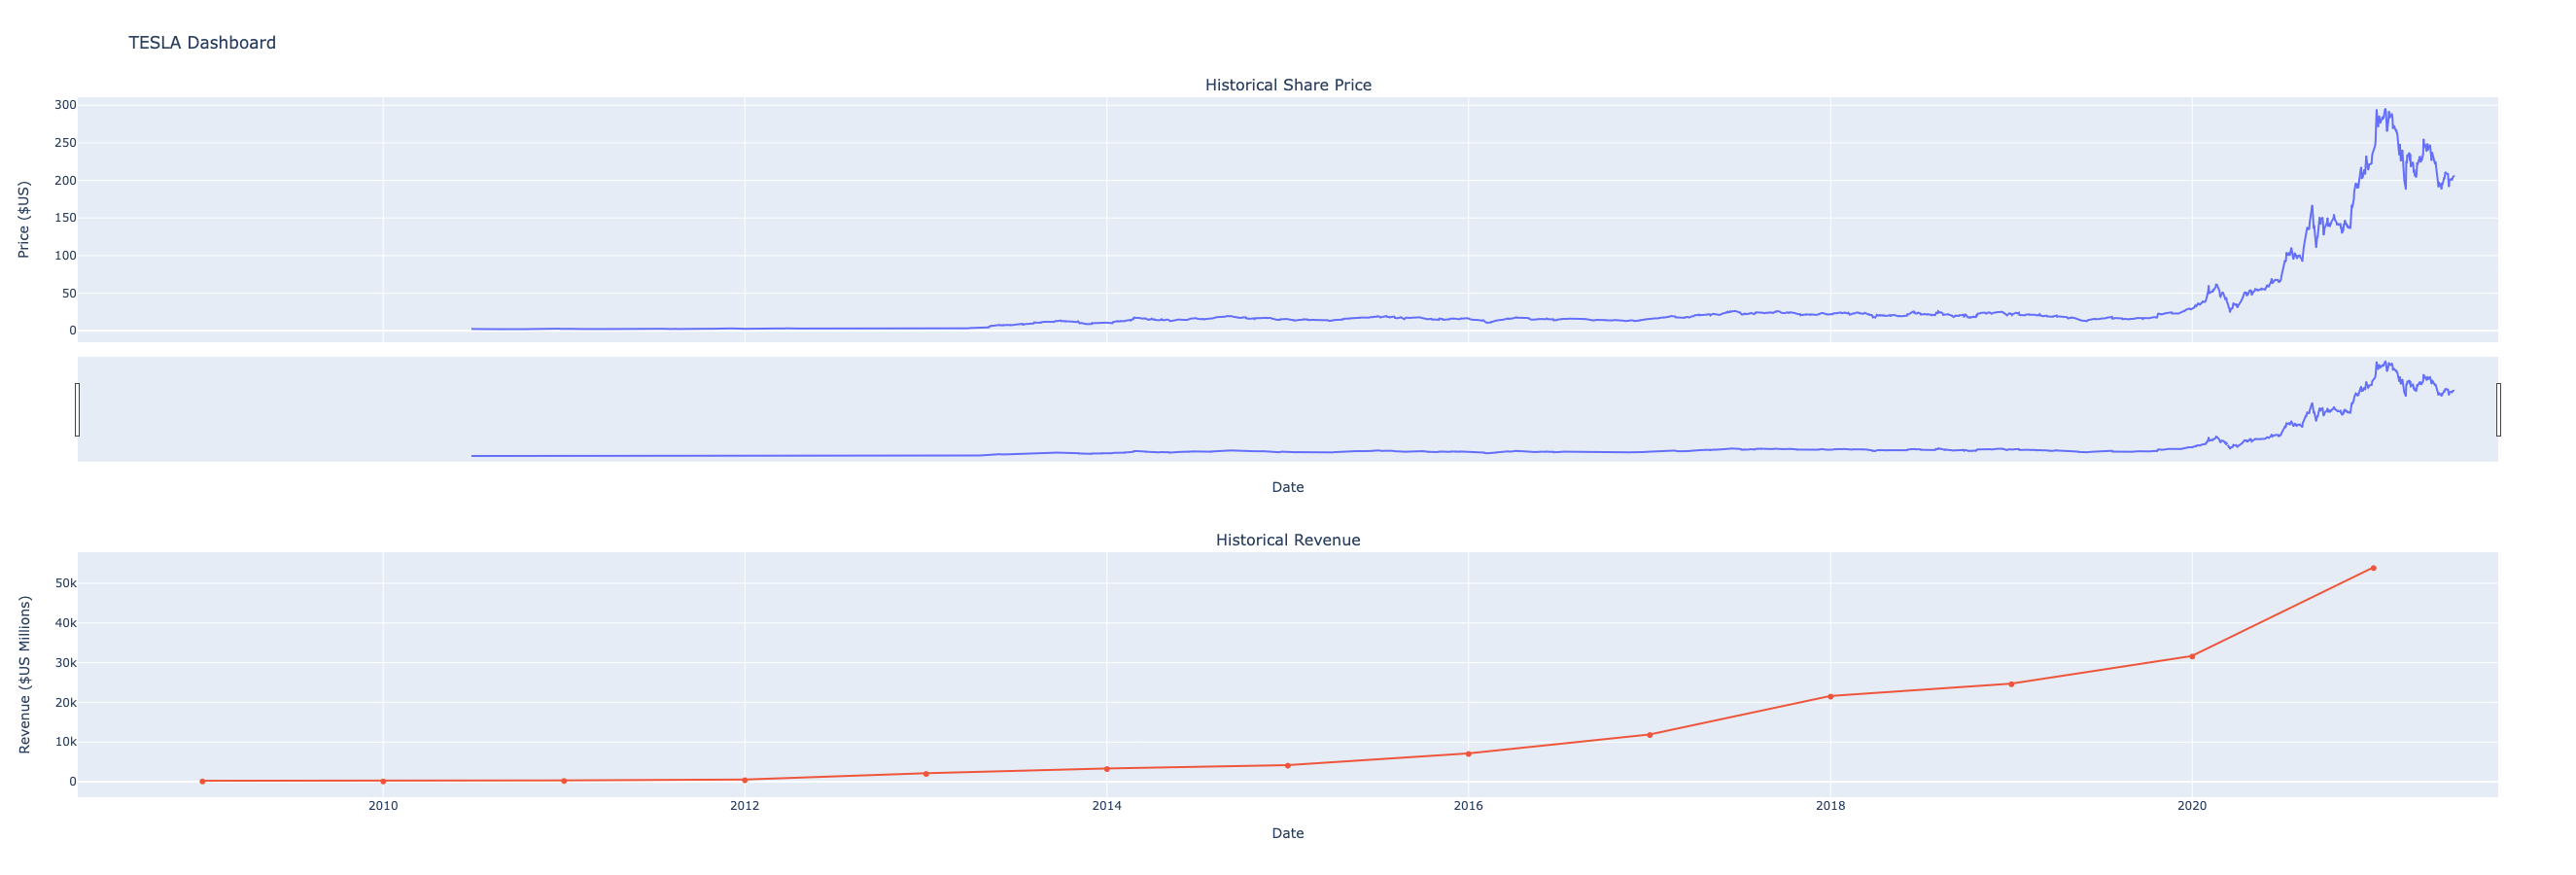

In [231]:
make_graph(stock_data=tsla_data, revenue_data=tsla_revenue, stock="Tesla Dashboard")

# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

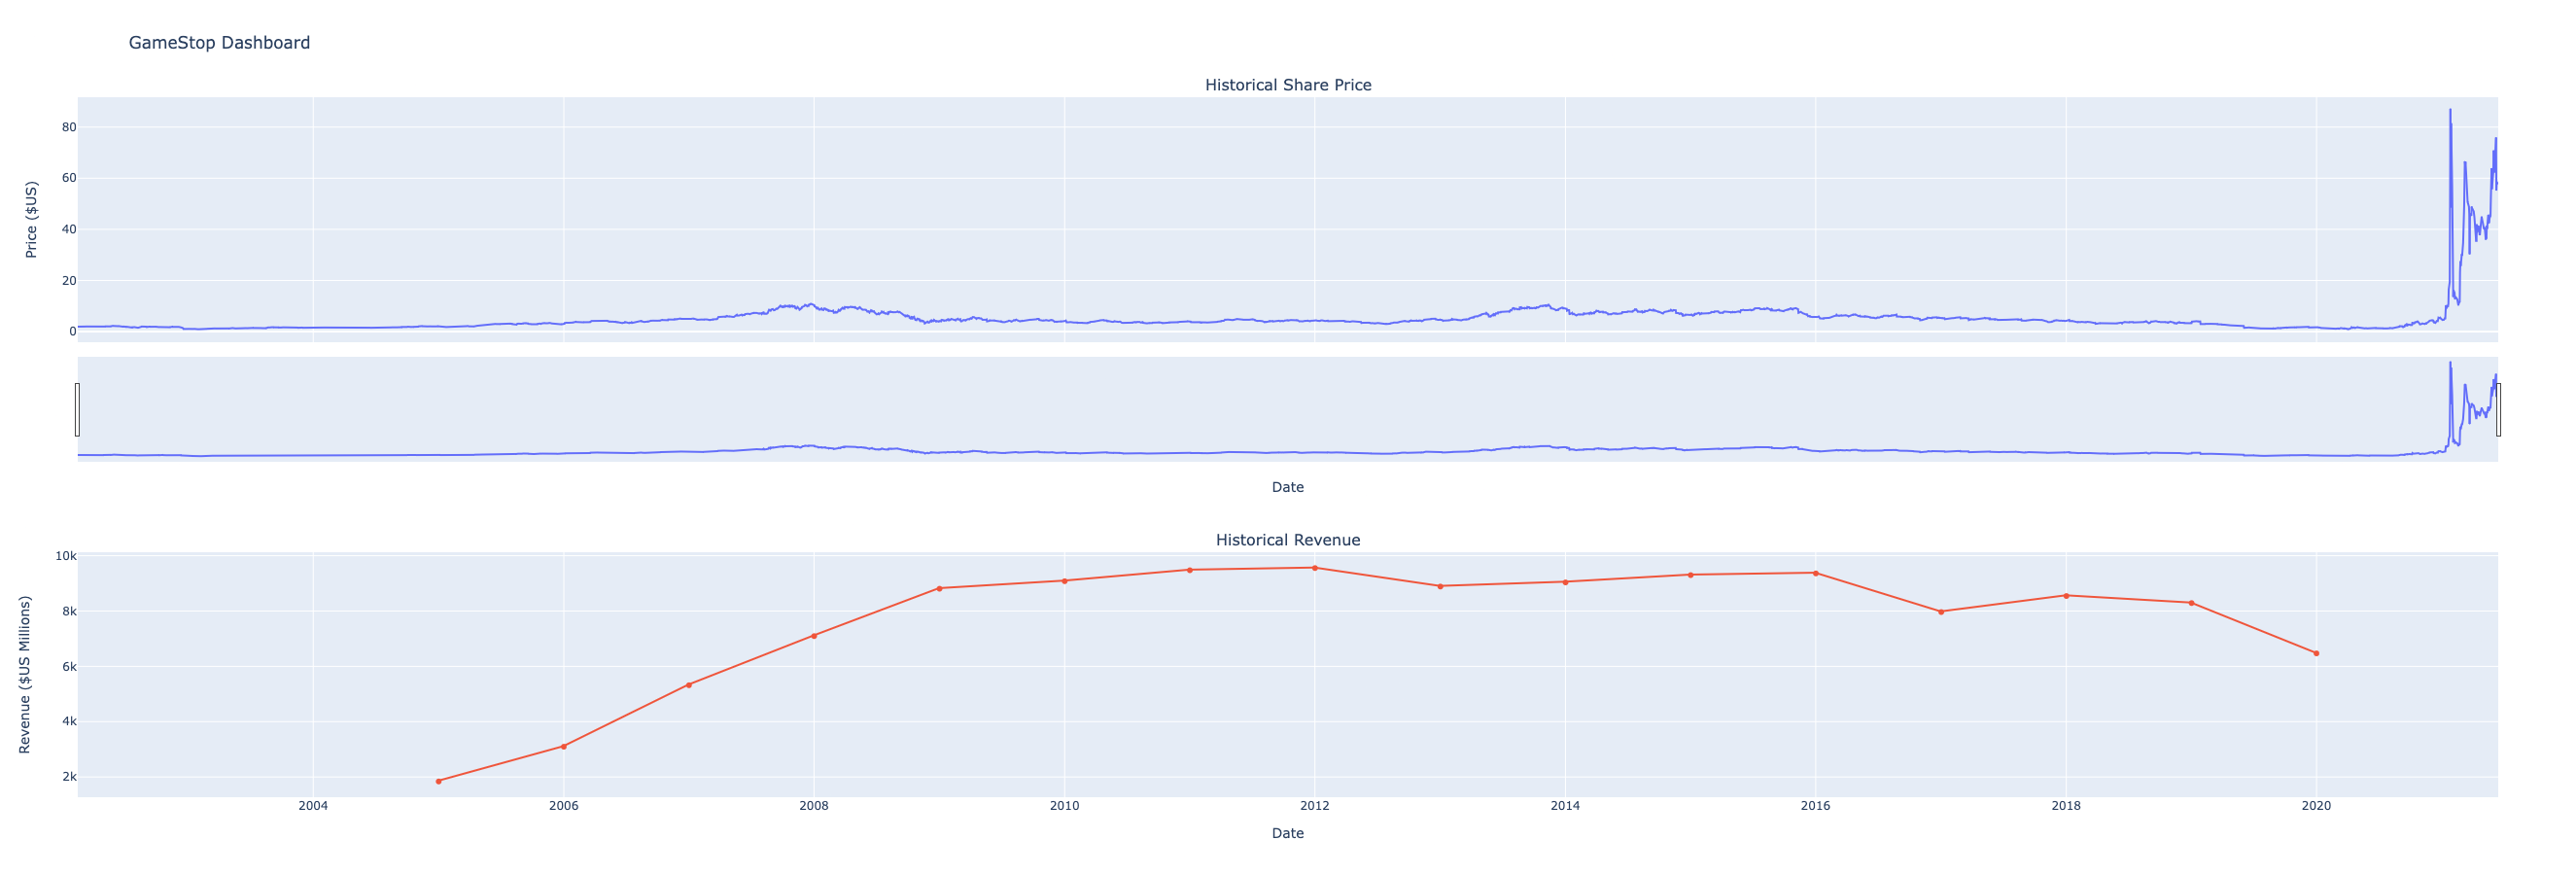

In [232]:
make_graph(stock_data=gme_data, revenue_data=gme_revenue, stock="GameStop Dashboard")